# Project 1: Global pairwise allignment

Question 1: What is the optimal (here maximal) cost of an alignment of AATAAT and AAGG using the above substitution matrix and gap cost -5?

Question 2: What is the optimal (here maximal) cost of an alignment of seq1.fasta

and seq2.fasta using the same substitution matrix and gap cost? (You probably want to implement the algorithm for computing the cost of an optimal alignment.)

Question 3 (optional): How does an optimal alignment look like for the above two pairs of sequences using the given substitution matrix and gap cost -5? (you probably want to implement the algorithm for finding an optimal alignment by backtracking through the dynamic programming table.)

Question 4 (optional): How many optimal alignments are for the above two pairs of sequences using the given substitution matrix and gap cost -5? Explain how you can compute the number of optimal alignments.

# Order of sequences + name of their index variable
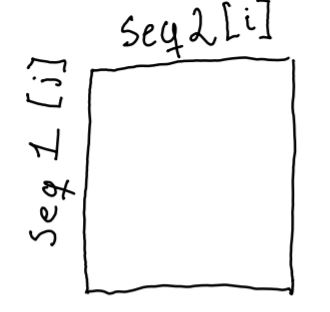
seq 1 is y axis (j) and seq 2 is x axis (i)  

In [2]:
import numpy as np
from Bio import SeqIO

In [3]:
# FASTA FILE READER
# How can I read a file from another folder? I have spaces in the path and that gives me troubles
# vars(record)
def fasta_reader(filename):  
    sequences = []
    for record in SeqIO.parse(filename, "fasta"):
        sequences.append([record.id,record.seq]) 
    return sequences

In [4]:
# HELPER FUNCTION
# Function to translate letters in sequences into numbers, which can be used to index the score matrix
def translate(letter):
    if letter == "A":
        return 0
    if letter == "C":
        return 1
    if letter == "G":
        return 2
    if letter == "T":
        return 3

In [5]:
# ALIGNMENT FUNCTION
def alignment(seq1,seq2,scorematrix,gapcost):
    
 ###   Initialize table. seq 1 is y axis (j) and seq 2 is x axis (i)    ###
    table = np.zeros([len(seq1)+1,len(seq2)+1])
    
    for j in range(1,len(seq1)+1):
        table[j,0] = gapcost*j
        
    for i in range(1,len(seq2)+1):
        table[0,i] = gapcost*i
        
        
 ###   Fill out table    ###
    for j in range(1,len(seq1)+1):
        for i in range(1,len(seq2)+1):
            diagonal = table[j-1,i-1]+scorematrix[translate(seq1[j-1]),translate(seq2[i-1])]
            up = table[j,i-1]+gapcost
            left = table[j-1,i]+gapcost
            table[j,i]=(max(diagonal,up,left))
    
#     return table[len(seq1),len(seq2)]   
    return table

In [6]:
# BACKTRACKING 
# Single best alignment

def backtracking(table, seq1, seq2,scorematrix, gapcost):
    ### Empty lists to add alignment to ###
    align1 = []
    align2 = []
    
    ### Set index to bottom right corner ###
    j=len(table)-1
    i=len(table[0])-1

        
    ### Backtrack ###
    while j > 0 or i > 0:
        cell = table[j,i]
        diagonal = table[j-1,i-1]+scorematrix[translate(seq1[j-1]),translate(seq2[i-1])]
        if j > 0 and i > 0 and diagonal == cell:
            align1.append(seq1[j-1]) # Add letter to both lists
            align2.append(seq2[i-1])
            j = j-1
            i = i-1
        elif j >= 0 and i > 0 and table[j,i-1]+gapcost == cell: #left
            align1.append("-") # Add letter to seq 2, but - to seq 1
            align2.append(seq2[i-1])
            i = i-1
        elif j > 0 and i >= 0 and table[j-1,i]+gapcost == cell: # up
#             print("up")
            align1.append(seq1[j-1]) # Add letter to seq 2, but - to seq 2
            align2.append("-")
            j = j-1
        else:
            return "error"

    align1.reverse()
    align1 = "".join(align1)
    align2.reverse()
    align2 = "".join(align2)
    test = np.array([[align1], [align2]])
    return test

In [7]:
# TEST
#Write sequences here:
seq1 = 'AATAAT'
seq2 = 'AAGG'

# Write score matrix here

# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1,seq2,scorematrix,-5)
# print(alignment_table)

a = backtracking(alignment_table, seq1, seq2, scorematrix, -5)
print(a)

[['AATAAT']
 ['AA-GG-']]


# Answers to questions

### Q1
Score of optimal alignment for the small sequences

In [8]:
#Write sequences here:
seq1 = 'AATAAT'
seq2 = 'AAGG'

# Write score matrix here
# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1,seq2,scorematrix,-5)
alignment_table[-1,-1]

20.0

### Q2
Score of optimal alignment for the long sequences

In [15]:
#Write sequences here:
seq1_real = fasta_reader("seq1.fasta")
seq1_real = str(seq1_real[0][1])
seq2_real = fasta_reader("seq2.fasta")
seq2_real = str(seq2_real[0][1])


# Write score matrix here
# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1_real,seq2_real,scorematrix,-5)
alignment_table[-1,-1]

FileNotFoundError: [Errno 2] No such file or directory: "mnt\\c\\Users\\ASUS\\'Google Drev'\\AU\\Aktuelle\\'Algorithms in Bioinformatics'\\seq2.fasta"

### Q3
Reconstruction of the optimal alignment for the small and large sequences

In [12]:
#Write sequences here:
seq1 = 'AATAAT'
seq2 = 'AAGG'

# Write score matrix here
# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1,seq2,scorematrix,-5)
visual_align = backtracking(alignment_table, seq1, seq2, scorematrix, -5)
print("Score:\n", alignment_table[-1,-1])
print("Alignment:")
print(visual_align)

Score:
 20.0
Alignment:
[['AATAAT']
 ['AA-GG-']]


In [13]:
#Write sequences here:
seq1_real = fasta_reader("seq1.fasta")
seq1_real = str(seq1_real[0][1])
seq2_real = fasta_reader("seq2.fasta")
seq2_real = str(seq2_real[0][1])


# Write score matrix here
# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1_real,seq2_real,scorematrix,-5)
visual_align = backtracking(alignment_table, seq1_real, seq2_real, scorematrix, -5)
print("Score:\n", alignment_table[-1,-1])
print("Alignment:")
print(visual_align)

Score:
 1346.0
Alignment:
[['GGCCTAAAGGCGCCGGTCTTTCGTACCCCAAAATCTCG-GCATTTTAAGATAAGTG-AGTGTTGCGTTACACTAGCGATCTACCGCGTCTTATACT-TAAGCG-TATGCCC-AGATCTGA-CTAATCGTGCCCCCGGATTAGACGGGCTTGATGGGAAAGAACAGCTCGTC---TGTT-TAC--GTATAAACAGAATCGCCTGGGTTCGC']
 ['GGGCTAAAGGTTAGGGTCTTTCACACTAAAGAGTGGTGCGTATCGT-GGCTAA-TGTACCGCTTC-TGGTA-TCGTGGCTTA-CG-GCCAGAC-CTACAAGTACTAGACCTGAGAACTAATCTTGTCGAGCCTTC-CATT-GA-GGG--TAATGGGAGAGAACATCGAGTCAGAAGTTATTCTTGTTTACGTAGAATCGCCTGGGTCCGC']]


### Q4
Logic: For every split, we have one extra optimal alignment
Idea: Follow all possible paths through the matrix and not just one. Count the number of alignments

In [ ]:
### For every split, we have one extra optimal alignment

In [366]:
# Backtracking one best alignment
# A = align
# D = deletion ( in seq 1)
# I = insertion (in seq 2)

def backtracking(table, seq1, seq2,scorematrix, gapcost, acc):
    
    ### Set index to bottom right corner ###
    j=len(seq1)
    i=len(seq2)

    ### Backtrack ###
    while j > 0 and i > 0:
        cell = table[j,i]
        counter = []
        diagonal = table[j-1,i-1]+scorematrix[translate(seq1[j-1]),translate(seq2[i-1])]
        left = table[j,i-1]+gapcost
        up = table[j-1,i]+gapcost
        if diagonal == cell:
            counter.append("A")
#             print("diagonal", diagonal)
        if left == cell: #left
            counter.append("D")
#             print("left",table[j,i-1]+gapcost )
        if up == cell: # up
            counter.append("I")
#             print("up", table[j-1,i]+gapcost) 
        if len(counter) == 0:
            return "error"
        if len(counter) == 1:
            if counter[0] == "A":
                j = j-1
                i = i-1
            elif counter[0] == "D":
                i = i-1
            elif counter[0] == "I":
                j = j-1
        else:
            for x in counter:
                if x == "A":
                    acc += 1
                    return backtracking(table, seq1[0,j+1], seq2[0,i+1], scorematrix, gapcost, acc)
                if x == "D":
                    acc += 1
                    return backtracking(table, seq1[0,j+1], seq2[0,i], scorematrix, gapcost, acc)
                if x == "I":
                    acc += 1
                    return backtracking(table, seq1[0,j], seq2[0,i+1], scorematrix, gapcost, acc)
            
            

#     align1.reverse()
#     align1 = "".join(align1)
#     align2.reverse()
#     align2 = "".join(align2)
#     test = np.array([[align1], [align2]])
    
    return acc

In [365]:
# TEST
#Write sequences here:
seq1 = 'AATAAT'
seq2 = 'AAGG'

# seq1 = 'AAGACT'
# seq2 = 'AATTT'

# Write score matrix here
# Order: ACGT x ACGT
scorematrix = np.array([[10,2,5,2],[2,10,2,5],[5,2,10,2], [2,5,2,10]])

alignment_table = alignment(seq1,seq2,scorematrix,-5)
visual_align = backtracking(alignment_table, seq1, seq2, scorematrix, -5, acc = 0)
print("Score:\n", alignment_table[-1,-1])
print("Alignment:")
print(visual_align)

Score:
 20.0
Alignment:
0
